In [1]:
!pip install pyswarm

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4518 sha256=0f9f96570744a6b9ff8f9531b6974cdbd2e96a36948d05203d593114147561d4
  Stored in directory: /root/.cache/pip/wheels/93/15/89/3970ef96abd6123028010a90f007c4e6a2bed700db0aa2d36a
Successfully built pyswarm


In [2]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Enables inline plotting in Jupyter/Colab notebooks
%matplotlib inline
np.set_printoptions(suppress=True)

# Scaling and model evaluation
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Machine learning models and tools
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import DBSCAN, KMeans

##=== Pandas ==
import pandas as pd

# === Imports ===
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Only needed if you're loading data from Google Drive

Mounted at /content/drive


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
Data= pd.read_csv("/content/drive/MyDrive/Network Maintenace - With & without maintenace/Original-data/2017-2020 (with main).csv")

In [6]:
Data.shape

(5110, 22)

In [7]:
Data.head(10)

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0       1395.0                    156.0                     54.0   
1      22429.0                    767.0                   4163.0   
2      22429.0                    767.0                   4163.0   
3      26595.0                    878.0                    186.0   
4       1964.0                     92.0                      6.0   
5       2182.0                    175.0                    242.0   
6      19601.0                    568.0                    196.0   
7      14674.0                    264.0                    205.0   
8      35793.0                   1432.0                    107.0   
9      10559.0                    443.0                     74.0   

   Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0              1590.0        82.0                     0.0   
1             22430.0       101.0                    10.0   
2             22430.0       128.0                    10.0   
3             37230.0       172.8                     0.0   
4              2750.0       287.0                     0.0   
5              3060.0       245.5                     0.0   
6             27440.0       196.5                     0.0   
7             27000.0       219.8                     0.0   
8             50110.0       209.9                     0.0   
9             19430.0       359.0                     0.0   

   Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                        6.0                   15.0              5   
1                        0.0                    6.0              1   
2                        0.0                    6.0              1   
3                        3.0                    6.0              3   
4                        3.0                    8.0              3   
5                        3.0                    8.0              3   
6                        3.0                    8.0              3   
7                        3.0                    8.0              3   
8                        3.0                    6.0              3   
9                        3.0                    8.0              3   

    Urban_Type  Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0        rural                  6                 2             0.0   
1        rural                  3                 2             0.0   
2  small urban                  3                 2             0.0   
3        urban                  2                 3             0.2   
4        urban                  2                 3             0.1   
5        urban                  2                 3             0.3   
6        urban                  2                 3             0.2   
7        urban                  2                 3             0.2   
8        urban                  2                 3             0.2   
9        urban                  2                 3             0.1   

   Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                      0.0              0.0                            2.0   
1                      0.0              0.0                            3.5   
2                      0.0              0.0                            3.5   
3                      0.0              0.0                            1.5   
4                      0.0              0.0                            1.5   
5                      0.0              0.0                            1.5   
6                      0.5              0.0                            1.5   
7                      4.8              0.0                            1.5   
8                      0.8              0.0                            1.5   
9                      1.0              0.0                            1.5   

   IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  
0        35.2      78.5     1081.5         5.6           1089.7     32  
1        88.2      76.0 

In [8]:
Data['Urban_Type'].unique()

array(['rural', 'small urban', 'urban'], dtype=object)

In [9]:
# Filter rows where 'Urban_Code_mode' is 'rural'
rural_rows = Data[Data['Urban_Type'] == 'rural']

# Display the filtered DataFrame
rural_rows.count()

AADT_mean_x                      2057
AADT_Single_Unit_mean_x          2057
AADT_Combination_mean_x          2057
Future_AADT_mean_x               2057
IRI_mean_x                       2057
Thickness_Rigid_mean_x           2057
Thickness_Flexible_mean_x        2057
Base_Thickness_mean_x            2057
F_System_mode                    2057
Urban_Type                       2057
Surface_Type_mode                2057
Base_Type_mode_x                 2057
Rutting_mean_x                   2057
Cracking_Percent_mean_x          2057
Faulting_mean_x                  2057
Last_Overlay_Thickness_mean_x    2057
IRI_mean_y                       2057
RHU_AV_x                         2055
FRZ_IDX_x                        2055
TEMP_AVG_x                       2055
PRECIPITATION_x                  2055
Age_x                            2057
dtype: int64

In [10]:
def treatment_category(Last_Overlay_Thickness_mean_x):
    if Last_Overlay_Thickness_mean_x == 0:
        return 'Resurfacing'
    elif 0 < Last_Overlay_Thickness_mean_x <= 0.6:
        return 'Slurry Seal'
    elif 0.6 < Last_Overlay_Thickness_mean_x <= 3:
        return 'Thin Layers'
    elif Last_Overlay_Thickness_mean_x > 3:
        return 'Thick Layers'

In [11]:
## Now apply your treatment-category function
# Apply the transformation and insert the new column next to 'Urban_Code_mode'
Data.insert(Data.columns.get_loc('Last_Overlay_Thickness_mean_x') + 1, 'Treatment_type', Data['Last_Overlay_Thickness_mean_x'].apply(treatment_category))

# Display the updated DataFrame to check if the transformation is applied as expected
Data.head(10)

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0       1395.0                    156.0                     54.0   
1      22429.0                    767.0                   4163.0   
2      22429.0                    767.0                   4163.0   
3      26595.0                    878.0                    186.0   
4       1964.0                     92.0                      6.0   
5       2182.0                    175.0                    242.0   
6      19601.0                    568.0                    196.0   
7      14674.0                    264.0                    205.0   
8      35793.0                   1432.0                    107.0   
9      10559.0                    443.0                     74.0   

   Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0              1590.0        82.0                     0.0   
1             22430.0       101.0                    10.0   
2             22430.0       128.0                    10.0   
3             37230.0       172.8                     0.0   
4              2750.0       287.0                     0.0   
5              3060.0       245.5                     0.0   
6             27440.0       196.5                     0.0   
7             27000.0       219.8                     0.0   
8             50110.0       209.9                     0.0   
9             19430.0       359.0                     0.0   

   Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                        6.0                   15.0              5   
1                        0.0                    6.0              1   
2                        0.0                    6.0              1   
3                        3.0                    6.0              3   
4                        3.0                    8.0              3   
5                        3.0                    8.0              3   
6                        3.0                    8.0              3   
7                        3.0                    8.0              3   
8                        3.0                    6.0              3   
9                        3.0                    8.0              3   

    Urban_Type  Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0        rural                  6                 2             0.0   
1        rural                  3                 2             0.0   
2  small urban                  3                 2             0.0   
3        urban                  2                 3             0.2   
4        urban                  2                 3             0.1   
5        urban                  2                 3             0.3   
6        urban                  2                 3             0.2   
7        urban                  2                 3             0.2   
8        urban                  2                 3             0.2   
9        urban                  2                 3             0.1   

   Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                      0.0              0.0                            2.0   
1                      0.0              0.0                            3.5   
2                      0.0              0.0                            3.5   
3                      0.0              0.0                            1.5   
4                      0.0              0.0                            1.5   
5                      0.0              0.0                            1.5   
6                      0.5              0.0                            1.5   
7                      4.8              0.0                            1.5   
8                      0.8              0.0                            1.5   
9                      1.0              0.0                            1.5   

  Treatment_type  IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  \
0    Thin Layers        35.2      78.5     1081.5         5.6   
1   Thick Layers        88.2      76.0  

In [12]:
Data['Treatment_type'].unique()

array(['Thin Layers', 'Thick Layers', 'Resurfacing'], dtype=object)

In [13]:
Data['Treatment_type'].count()

np.int64(5110)

In [14]:
Data.dtypes

AADT_mean_x                      float64
AADT_Single_Unit_mean_x          float64
AADT_Combination_mean_x          float64
Future_AADT_mean_x               float64
IRI_mean_x                       float64
Thickness_Rigid_mean_x           float64
Thickness_Flexible_mean_x        float64
Base_Thickness_mean_x            float64
F_System_mode                      int64
Urban_Type                        object
Surface_Type_mode                  int64
Base_Type_mode_x                   int64
Rutting_mean_x                   float64
Cracking_Percent_mean_x          float64
Faulting_mean_x                  float64
Last_Overlay_Thickness_mean_x    float64
Treatment_type                    object
IRI_mean_y                       float64
RHU_AV_x                         float64
FRZ_IDX_x                        float64
TEMP_AVG_x                       float64
PRECIPITATION_x                  float64
Age_x                              int64
dtype: object

In [15]:
Data.columns

Index(['AADT_mean_x', 'AADT_Single_Unit_mean_x', 'AADT_Combination_mean_x',
       'Future_AADT_mean_x', 'IRI_mean_x', 'Thickness_Rigid_mean_x',
       'Thickness_Flexible_mean_x', 'Base_Thickness_mean_x', 'F_System_mode',
       'Urban_Type', 'Surface_Type_mode', 'Base_Type_mode_x', 'Rutting_mean_x',
       'Cracking_Percent_mean_x', 'Faulting_mean_x',
       'Last_Overlay_Thickness_mean_x', 'Treatment_type', 'IRI_mean_y',
       'RHU_AV_x', 'FRZ_IDX_x', 'TEMP_AVG_x', 'PRECIPITATION_x', 'Age_x'],
      dtype='object')

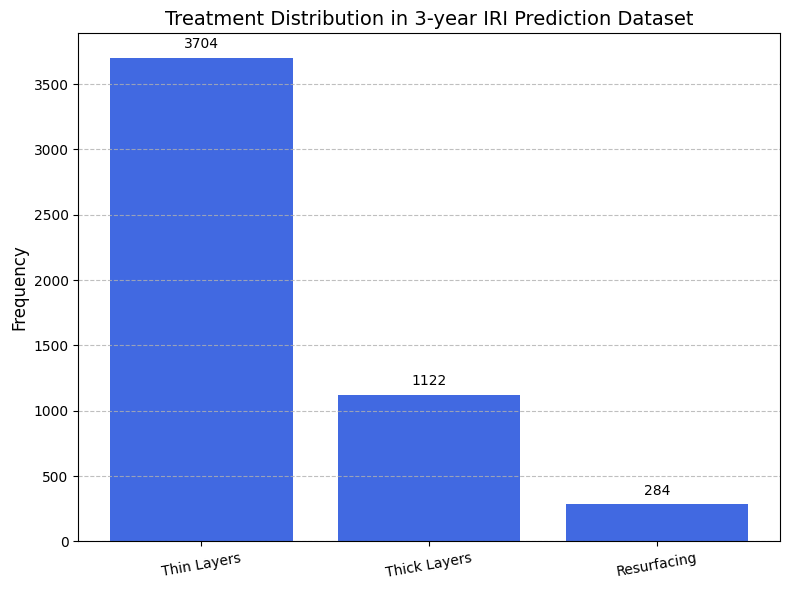

In [16]:
import matplotlib.pyplot as plt

# Count treatment types
treatment_counts = Data['Treatment_type'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(treatment_counts.index, treatment_counts.values, color='royalblue')

# Add annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{int(yval)}', ha='center', va='bottom', fontsize=10)

# Customize chart
plt.title("Treatment Distribution in 3-year IRI Prediction Dataset", fontsize=14)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


In [17]:
categorical_columns = Data[['Urban_Type','Treatment_type']]

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(categorical_columns)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Urban_Type','Treatment_type']))

df_encoded = pd.concat([Data, one_hot_df], axis=1)

df_encoded_2017_2020 = df_encoded.drop(categorical_columns, axis=1) ## Change this name to df_encoded_2017_2020


In [18]:
df_encoded_2017_2020.head(10)

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0       1395.0                    156.0                     54.0   
1      22429.0                    767.0                   4163.0   
2      22429.0                    767.0                   4163.0   
3      26595.0                    878.0                    186.0   
4       1964.0                     92.0                      6.0   
5       2182.0                    175.0                    242.0   
6      19601.0                    568.0                    196.0   
7      14674.0                    264.0                    205.0   
8      35793.0                   1432.0                    107.0   
9      10559.0                    443.0                     74.0   

   Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0              1590.0        82.0                     0.0   
1             22430.0       101.0                    10.0   
2             22430.0       128.0                    10.0   
3             37230.0       172.8                     0.0   
4              2750.0       287.0                     0.0   
5              3060.0       245.5                     0.0   
6             27440.0       196.5                     0.0   
7             27000.0       219.8                     0.0   
8             50110.0       209.9                     0.0   
9             19430.0       359.0                     0.0   

   Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                        6.0                   15.0              5   
1                        0.0                    6.0              1   
2                        0.0                    6.0              1   
3                        3.0                    6.0              3   
4                        3.0                    8.0              3   
5                        3.0                    8.0              3   
6                        3.0                    8.0              3   
7                        3.0                    8.0              3   
8                        3.0                    6.0              3   
9                        3.0                    8.0              3   

   Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0                  6                 2             0.0   
1                  3                 2             0.0   
2                  3                 2             0.0   
3                  2                 3             0.2   
4                  2                 3             0.1   
5                  2                 3             0.3   
6                  2                 3             0.2   
7                  2                 3             0.2   
8                  2                 3             0.2   
9                  2                 3             0.1   

   Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                      0.0              0.0                            2.0   
1                      0.0              0.0                            3.5   
2                      0.0              0.0                            3.5   
3                      0.0              0.0                            1.5   
4                      0.0              0.0                            1.5   
5                      0.0              0.0                            1.5   
6                      0.5              0.0                            1.5   
7                      4.8              0.0                            1.5   
8                      0.8              0.0                            1.5   
9                      1.0              0.0                            1.5   

   IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
0        35.2      78.5     1081.5         5.6           1089.7     32   
1        88.2      76.0      896.3         7.3            979.6      8   
2       125.0      76.0      896.3         7.3            979.6      8   
3       163.4    

In [19]:
df_thin_layers = df_encoded_2017_2020[df_encoded_2017_2020['Treatment_type_Thin Layers'] == 1]
print(df_thin_layers.shape)
print("Rural datapoints in thin layer treatments:", df_thin_layers[df_thin_layers['Urban_Type_rural'] == 1].count())
print("Small Urban datapoints in thin layer treatments:", df_thin_layers[df_thin_layers['Urban_Type_small urban'] ==1].count())
print("Urban datapoints in thin layer treatments:", df_thin_layers[df_thin_layers['Urban_Type_urban'] ==1].count())
df_thin_layers.to_csv("df_thin_layers_2017_2020.csv", index=False)
df_thin_layers.head(10)

(3704, 27)
Rural datapoints in thin layer treatments: AADT_mean_x                      1367
AADT_Single_Unit_mean_x          1367
AADT_Combination_mean_x          1367
Future_AADT_mean_x               1367
IRI_mean_x                       1367
Thickness_Rigid_mean_x           1367
Thickness_Flexible_mean_x        1367
Base_Thickness_mean_x            1367
F_System_mode                    1367
Surface_Type_mode                1367
Base_Type_mode_x                 1367
Rutting_mean_x                   1367
Cracking_Percent_mean_x          1367
Faulting_mean_x                  1367
Last_Overlay_Thickness_mean_x    1367
IRI_mean_y                       1367
RHU_AV_x                         1366
FRZ_IDX_x                        1366
TEMP_AVG_x                       1366
PRECIPITATION_x                  1366
Age_x                            1367
Urban_Type_rural                 1367
Urban_Type_small urban           1367
Urban_Type_urban                 1367
Treatment_type_Resurfacing       1

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0        1395.0                    156.0                     54.0   
3       26595.0                    878.0                    186.0   
4        1964.0                     92.0                      6.0   
5        2182.0                    175.0                    242.0   
6       19601.0                    568.0                    196.0   
7       14674.0                    264.0                    205.0   
8       35793.0                   1432.0                    107.0   
9       10559.0                    443.0                     74.0   
10       7007.0                    126.0                     98.0   
11       4735.0                    118.0                     52.0   

    Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0               1590.0        82.0                     0.0   
3              37230.0       172.8                     0.0   
4               2750.0       287.0                     0.0   
5               3060.0       245.5                     0.0   
6              27440.0       196.5                     0.0   
7              27000.0       219.8                     0.0   
8              50110.0       209.9                     0.0   
9              19430.0       359.0                     0.0   
10              9810.0       127.0                     0.0   
11              6630.0       204.0                     0.0   

    Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                         6.0                   15.0              5   
3                         3.0                    6.0              3   
4                         3.0                    8.0              3   
5                         3.0                    8.0              3   
6                         3.0                    8.0              3   
7                         3.0                    8.0              3   
8                         3.0                    6.0              3   
9                         3.0                    8.0              3   
10                        3.0                    6.0              3   
11                        3.0                    6.0              3   

    Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0                   6                 2             0.0   
3                   2                 3             0.2   
4                   2                 3             0.1   
5                   2                 3             0.3   
6                   2                 3             0.2   
7                   2                 3             0.2   
8                   2                 3             0.2   
9                   2                 3             0.1   
10                  2                 3             0.0   
11                  2                 3             0.1   

    Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                       0.0              0.0                            2.0   
3                       0.0              0.0                            1.5   
4                       0.0              0.0                            1.5   
5                       0.0              0.0                            1.5   
6                       0.5              0.0                            1.5   
7                       4.8              0.0                            1.5   
8                       0.8              0.0                            1.5   
9                       1.0              0.0                            1.5   
10                      0.0              0.0                            1.5   
11                      3.0              0.0                            1.5   

    IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
0         35.2      78.5     1081.5         5.6           1089.7     32   
3        163.4      67.1        3.7        19.6            933.1     24   
4        242.0      67.6        1.

In [20]:
df_thick_layers = df_encoded_2017_2020[df_encoded_2017_2020['Treatment_type_Thick Layers'] == 1]
print(df_thick_layers.shape)
print("Rural datapoints in thick layer treatments:", df_thick_layers[df_thick_layers['Urban_Type_rural'] == 1].count())
print("Small Urban datapoints in thick layer treatments:", df_thick_layers[df_thick_layers['Urban_Type_small urban'] ==1].count())
print("Urban datapoints in thick layer treatments:", df_thick_layers[df_thick_layers['Urban_Type_urban'] ==1].count())
df_thick_layers.to_csv("df_thick_layers.csv", index=False)
df_thick_layers.head(10)

(1122, 27)
Rural datapoints in thick layer treatments: AADT_mean_x                      592
AADT_Single_Unit_mean_x          592
AADT_Combination_mean_x          592
Future_AADT_mean_x               592
IRI_mean_x                       592
Thickness_Rigid_mean_x           592
Thickness_Flexible_mean_x        592
Base_Thickness_mean_x            592
F_System_mode                    592
Surface_Type_mode                592
Base_Type_mode_x                 592
Rutting_mean_x                   592
Cracking_Percent_mean_x          592
Faulting_mean_x                  592
Last_Overlay_Thickness_mean_x    592
IRI_mean_y                       592
RHU_AV_x                         591
FRZ_IDX_x                        591
TEMP_AVG_x                       591
PRECIPITATION_x                  591
Age_x                            592
Urban_Type_rural                 592
Urban_Type_small urban           592
Urban_Type_urban                 592
Treatment_type_Resurfacing       592
Treatment_type_Thick

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
1       22429.0                    767.0                   4163.0   
2       22429.0                    767.0                   4163.0   
56      46000.0                   1710.0                   5740.0   
60      57000.0                    830.0                   2860.0   
61      72000.0                   2200.0                   8060.0   
62      64000.0                   1950.0                   7160.0   
68     132000.0                   3060.0                   4000.0   
69     138000.0                   3200.0                   4180.0   
78      28000.0                    770.0                   3300.0   
86     118000.0                   2610.0                   8250.0   

    Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
1              22430.0       101.0                    10.0   
2              22430.0       128.0                    10.0   
56             52000.0        45.0                     0.0   
60             59600.0        42.9                     8.0   
61             77200.0        52.6                     8.0   
62             64600.0        48.7                     8.0   
68            162900.0        50.2                    11.0   
69            174700.0        43.0                    11.0   
78             32100.0        63.9                     0.0   
86            138700.0        37.2                     0.0   

    Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
1                         0.0                    6.0              1   
2                         0.0                    6.0              1   
56                       11.5                   11.0              1   
60                        7.0                    4.0              1   
61                        7.0                    4.0              1   
62                        7.0                    4.0              1   
68                        0.5                   13.0              1   
69                        0.5                   13.0              1   
78                        6.5                   14.0              1   
86                       13.5                   12.0              1   

    Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
1                   3                 2             0.0   
2                   3                 2             0.0   
56                  2                 2             0.1   
60                  2                 2             0.1   
61                  2                 2             0.1   
62                  2                 2             0.1   
68                  7                 3             0.1   
69                  7                 3             0.1   
78                  2                 2             0.1   
86                  2                 2             0.1   

    Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
1                       0.0              0.0                            3.5   
2                       0.0              0.0                            3.5   
56                      0.0              0.0                            4.0   
60                      0.0              0.0                            7.0   
61                      0.0              0.0                            7.0   
62                      0.0              0.0                            7.0   
68                      0.0              0.0                            3.5   
69                      0.0              0.0                            3.5   
78                      0.0              0.0                            3.9   
86                      0.2              0.0                            3.5   

    IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
1         88.2      76.0      896.3         7.3            979.6      8   
2        125.0      76.0      896.3         7.3            979.6      8   
56        41.0       NaN        Na

In [21]:
df_resurf_ = df_encoded_2017_2020[df_encoded_2017_2020['Treatment_type_Resurfacing']==1]
print(df_resurf_.shape)
print("Rural datapoints in resurfacing treatments:", df_resurf_[df_resurf_['Urban_Type_rural'] == 1].count())
print("Small Urban datapoints inresurfacing treatments:", df_resurf_[df_resurf_['Urban_Type_small urban'] ==1].count())
print("Urban datapoints in resurfacing treatments:", df_resurf_[df_resurf_['Urban_Type_urban'] ==1].count())
df_resurf_.to_csv("df_resurf__2017_2020.csv", index=False)
df_resurf_.head(10)

(284, 27)
Rural datapoints in resurfacing treatments: AADT_mean_x                      98
AADT_Single_Unit_mean_x          98
AADT_Combination_mean_x          98
Future_AADT_mean_x               98
IRI_mean_x                       98
Thickness_Rigid_mean_x           98
Thickness_Flexible_mean_x        98
Base_Thickness_mean_x            98
F_System_mode                    98
Surface_Type_mode                98
Base_Type_mode_x                 98
Rutting_mean_x                   98
Cracking_Percent_mean_x          98
Faulting_mean_x                  98
Last_Overlay_Thickness_mean_x    98
IRI_mean_y                       98
RHU_AV_x                         98
FRZ_IDX_x                        98
TEMP_AVG_x                       98
PRECIPITATION_x                  98
Age_x                            98
Urban_Type_rural                 98
Urban_Type_small urban           98
Urban_Type_urban                 98
Treatment_type_Resurfacing       98
Treatment_type_Thick Layers      98
Treatment_

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
14      25756.0                    489.0                   1418.0   
15      40355.0                   1129.0                   6254.0   
16      17437.0                    191.0                    331.0   
17      46586.0                    932.0                   2657.0   
19      39119.0                    665.0                   1956.0   
20      17560.0                    439.0                   4384.0   
21      17560.0                    439.0                   4384.0   
22      17560.0                    439.0                   4384.0   
23      27942.0                   1342.0                   4249.0   
24      22589.0                    520.0                   5286.0   

    Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
14             25867.0       114.7                     8.0   
15             40642.0       105.6                    10.0   
16             17455.0        81.2                     0.0   
17             46596.0       175.0                     9.5   
19             38970.0       162.0                     8.0   
20             17568.0        64.3                    10.5   
21             17568.0        83.0                    11.0   
22             17568.0        74.2                    11.0   
23             28833.0        70.6                    11.0   
24             22649.0        97.1                     9.5   

    Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
14                        0.0                   16.0              2   
15                        0.0                   16.0              1   
16                        5.5                   24.0              4   
17                        0.0                   16.0              1   
19                        0.0                   16.0              2   
20                        0.0                   16.0              1   
21                        0.0                   16.0              1   
22                        0.0                   16.0              1   
23                        0.0                   16.0              1   
24                        0.0                   16.0              1   

    Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
14                  3                 2             0.0   
15                  3                 2             0.0   
16                  2                 2             0.1   
17                  3                 2             0.0   
19                  3                 2             0.0   
20                  3                 2             0.0   
21                  3                 2             0.0   
22                  3                 2             0.0   
23                  3                 2             0.0   
24                  3                 2             0.0   

    Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
14                     83.3              0.1                            0.0   
15                      2.6              0.1                            0.0   
16                      6.4              0.0                            0.0   
17                     67.0              0.2                            0.0   
19                      0.0              0.0                            0.0   
20                      0.0              0.0                            0.0   
21                      0.0              0.0                            0.0   
22                      0.0              0.1                            0.0   
23                      0.0              0.1                            0.0   
24                      3.3              0.1                            0.0   

    IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
14        94.7      76.2      535.4         8.5           1068.6     27   
15        82.7      76.8      494.6         8.6           1109.3     24   
16        65.5      76.8      494.

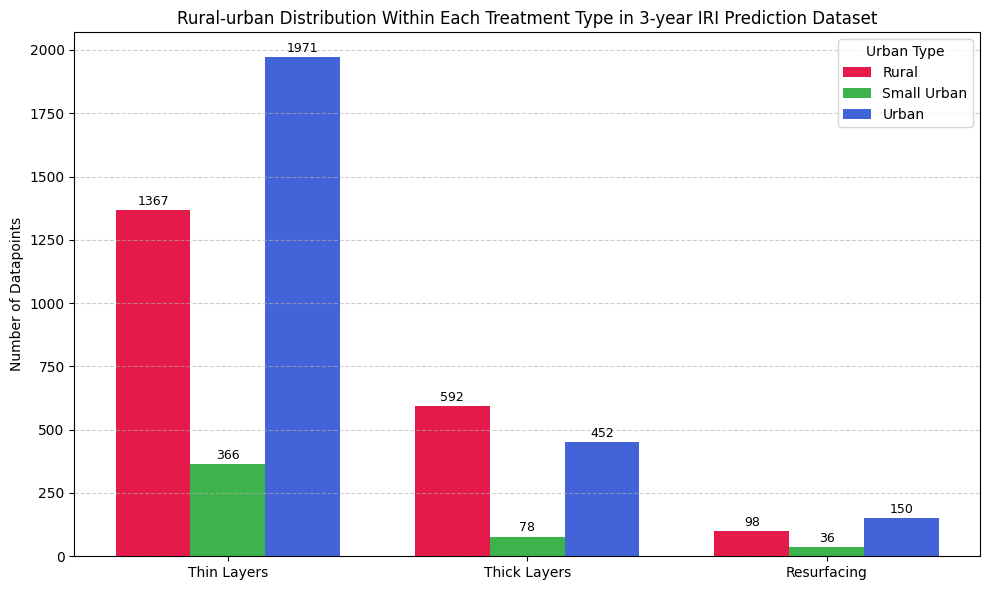

In [22]:
import matplotlib.pyplot as plt

# Automatically extract counts
counts = {
    "Thin Layers": {
        "Rural": df_thin_layers[df_thin_layers['Urban_Type_rural'] == 1].shape[0],
        "Small Urban": df_thin_layers[df_thin_layers['Urban_Type_small urban'] == 1].shape[0],
        "Urban": df_thin_layers[df_thin_layers['Urban_Type_urban'] == 1].shape[0]
    },
    "Thick Layers": {
        "Rural": df_thick_layers[df_thick_layers['Urban_Type_rural'] == 1].shape[0],
        "Small Urban": df_thick_layers[df_thick_layers['Urban_Type_small urban'] == 1].shape[0],
        "Urban": df_thick_layers[df_thick_layers['Urban_Type_urban'] == 1].shape[0]
    },
    "Resurfacing": {
        "Rural": df_resurf_[df_resurf_['Urban_Type_rural'] == 1].shape[0],
        "Small Urban": df_resurf_[df_resurf_['Urban_Type_small urban'] == 1].shape[0],
        "Urban": df_resurf_[df_resurf_['Urban_Type_urban'] == 1].shape[0]
    }
}

# Labels and categories
group_labels = list(counts.keys())  # Treatment types
urban_categories = ["Rural", "Small Urban", "Urban"]

# Restructure data for plotting
reversed_values = [[counts[t][cat] for t in group_labels] for cat in urban_categories]

# Plotting setup
x = range(len(group_labels))
width = 0.25

plt.figure(figsize=(10, 6))
colors = ['#e6194b', '#3cb44b', '#4363d8']

# Plot bars
for i, (category, color) in enumerate(zip(urban_categories, colors)):
    bar = plt.bar([p + width*i for p in x], reversed_values[i], width=width, label=category, color=color)
    for j, val in enumerate(reversed_values[i]):
        plt.text(j + width*i, val + 20, str(val), ha='center', fontsize=9)

# Axis formatting
plt.xticks([p + width for p in x], group_labels)
plt.ylabel("Number of Datapoints")
plt.title("Rural-urban Distribution Within Each Treatment Type in 3-year IRI Prediction Dataset")
plt.legend(title="Urban Type")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save and show
plt.show()

In [23]:
df_encoded_2017_2020.head(10)

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0       1395.0                    156.0                     54.0   
1      22429.0                    767.0                   4163.0   
2      22429.0                    767.0                   4163.0   
3      26595.0                    878.0                    186.0   
4       1964.0                     92.0                      6.0   
5       2182.0                    175.0                    242.0   
6      19601.0                    568.0                    196.0   
7      14674.0                    264.0                    205.0   
8      35793.0                   1432.0                    107.0   
9      10559.0                    443.0                     74.0   

   Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0              1590.0        82.0                     0.0   
1             22430.0       101.0                    10.0   
2             22430.0       128.0                    10.0   
3             37230.0       172.8                     0.0   
4              2750.0       287.0                     0.0   
5              3060.0       245.5                     0.0   
6             27440.0       196.5                     0.0   
7             27000.0       219.8                     0.0   
8             50110.0       209.9                     0.0   
9             19430.0       359.0                     0.0   

   Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                        6.0                   15.0              5   
1                        0.0                    6.0              1   
2                        0.0                    6.0              1   
3                        3.0                    6.0              3   
4                        3.0                    8.0              3   
5                        3.0                    8.0              3   
6                        3.0                    8.0              3   
7                        3.0                    8.0              3   
8                        3.0                    6.0              3   
9                        3.0                    8.0              3   

   Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0                  6                 2             0.0   
1                  3                 2             0.0   
2                  3                 2             0.0   
3                  2                 3             0.2   
4                  2                 3             0.1   
5                  2                 3             0.3   
6                  2                 3             0.2   
7                  2                 3             0.2   
8                  2                 3             0.2   
9                  2                 3             0.1   

   Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                      0.0              0.0                            2.0   
1                      0.0              0.0                            3.5   
2                      0.0              0.0                            3.5   
3                      0.0              0.0                            1.5   
4                      0.0              0.0                            1.5   
5                      0.0              0.0                            1.5   
6                      0.5              0.0                            1.5   
7                      4.8              0.0                            1.5   
8                      0.8              0.0                            1.5   
9                      1.0              0.0                            1.5   

   IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
0        35.2      78.5     1081.5         5.6           1089.7     32   
1        88.2      76.0      896.3         7.3            979.6      8   
2       125.0      76.0      896.3         7.3            979.6      8   
3       163.4    

In [24]:
## Data.drop(['Urban_Type'], axis=1, inplace=True)

In [25]:
df_encoded_2017_2020.shape

(5110, 27)

In [26]:
import os

# Define the directory path
dir_path = "/content/drive/MyDrive/Network Maintenace - With & without maintenace/conference-encoded-data/Treatment-encoded-dataset-2017-2020"

# Create the directory if it doesn't exist
os.makedirs(dir_path, exist_ok=True)

# Now save the file
df_encoded_2017_2020.to_csv(f"{dir_path}/df_encoded_2017_2020.csv", index=False)
